Autor: **Gabriel Leite Bessa**

Turma: **T1**

Disciplina: **Cálculo Númerico Computacional**

Por favor, executar todas as células menos o bloco de bibliotecas extras. Existem algumas dependências entre as funções dentro do bloco de funções necessárias.

Alguns conteúdos de ajuda:

https://medium.com/20-21/primeiros-passos-com-matplotlib-gr%C3%A1ficos-3d-545e856f6b2e

https://acervolima.com/como-calcular-os-autovalores-e-autovetores-direitos-de-uma-determinada-matriz-quadrada-usando-numpy/

https://www.geeksforgeeks.org/make-3d-interactive-matplotlib-plot-in-jupyter-notebook/

# Importando as bibliotecas

In [35]:
import numpy as np
import math
import itertools
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from tabulate import tabulate

# Bibliotecas extras

In [34]:
# Utilização de graficos 3D (não consegui configurar)

!pip install ipympl

#%matplotlib inline
%matplotlib widget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.7 MB/s eta 0:00:00
ERROR: Operation cancelled by user


ModuleNotFoundError: ignored

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

# Funções necessárias

In [36]:
def triangle_area(points: np.array) -> float:
  if points.shape[0] != 3:
    raise Exception("Ops, that is not a triangle!")

  if points.shape[1] == 2:
    t = np.array([[1],[1],[1]])
    points = np.concatenate((points, t), axis=1)

  return determinant(points)

In [37]:
def factorial(n: int) -> int:
  result = 1
  for i in range(1, n + 1):
    result *= i
  return result

In [38]:
# Verifica o numero de inversoes (usado para o calculo do determinante)
#   Uma inversão é quando um número posterior ao outro é menor que o segundo citado em uma lista
def num_inversions(l: list[int]) -> int:
  n_inv = 0
  for i in range(len(l)):
    for j in range(i + 1, len(l)):
      if l[i] > l[j]:
        n_inv += 1

  return n_inv

In [39]:
# Realiza a retro substituição e retorna os resultados
#   Só funciona para matrizes no qual a triangular inferior é nula e a diagonal for não nula
def retro_replacement(A: np.array, b: np.array) -> np.array:
  xs = np.zeros(shape=A.shape[0])
  for i in range(A.shape[0] - 1, -1, -1):
    if (A[i, i] == 0):
      raise ZeroDivisionError("Main diagonal had a 0 value!")

    xs[i] = b[i, 0]
    for k in range(A.shape[1] - 1, -1, -1):
      if k == i:
        continue
      xs[i] -= A[i, k] * xs[k]
    xs[i] = xs[i] / A[i, i]

  return xs

In [40]:
# Realiza o pivotamento parcial e retorna a matriz pivotada
def partial_pivoting(A: np.array, b: np.array) -> tuple[np.array, np.array]:
  for j in range(0, A.shape[0] - 1):
    Amax = np.abs(A[j, j])
    p = j

    for k in range(j + 1, A.shape[0]):
      if np.abs(A[k, j]) > Amax:
        Amax = abs(A[k, j])
        p = k

    if p != j:
      for k in range(0, A.shape[1]):
        A[j, k], A[p, k] = A[p, k], A[j, k]
      b[j, 0], b[p, 0] = b[p, 0], b[j, 0]

  return A, b

In [82]:
# Realiza o cálculo do determinante
def determinant(A: np.array) -> float:
  if (A.shape[0] != A.shape[1]):
    raise Exception("Not a quadratic matrix!")

  det = 0.0
  J = itertools.permutations(range(A.shape[0]))
  for j in J:
    det += (-1)**(num_inversions(j))
    for i in range(0, A.shape[0]):
      det *= A[i, j[i]]

  return det

In [42]:
def is_symmetric(A: np.array) -> bool:
  for i in range(0, A.shape[0]):
    for j in range(0, A.shape[1]):
      if A[i, j] != A[j, i]:
        return False
  return True

In [80]:
def minimum_determinants_dif_from_zero(A: np.array) -> bool:
  for i in range(1, A.shape[0]+1):
    if determinant(A[0:i, 0:i].copy()) == 0:
      return False
  return True

In [211]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvals.html
def spectral_radius(A: np.array) -> float:
  return np.max(np.abs(np.linalg.eigvals(A))).real

In [234]:
# https://cn.ect.ufrn.br/index.php?r=conteudo%2Fsislin-cconvergencia
# Decidi utilizar o método demonstrado no link acima para verificação do critério das linhas e colunas.
def dominant_diagonaly(A: np.array) -> bool:
  if A.shape[0] != A.shape[1]:
    return False

  cLinhas = np.max(np.linalg.norm(A, axis=0)) < 1
  cColunas = np.max(np.linalg.norm(A, axis=1)) < 1

  return cLinhas or cColunas

In [46]:
def stop_criteria1(x0: np.array, x1: np.array, episolon: float) -> bool:
  return np.max(np.abs(x1 - x0))/np.max(np.abs(x1)) < episolon

In [47]:
def stop_criteria2(x: np.array, A: np.array, b: np.array, episolon) -> bool:
  return np.max(np.abs(np.dot(A, x) - b)) < episolon

In [261]:
def plot_graphic(eqs, a, b, solutions=None):
  x = np.linspace(a, b, 10000)

  plt.figure(figsize=(6, 4))
  for i, eq in enumerate(eqs):
    plt.plot(x, eq(x), label=f"Function {i}")

  if solutions:
    plt.scatter(solutions[0, 0], solutions[1, 0], label=f'Solução (x1, x2) = ({solutions[0, 0]:.2f}, {solutions[1, 0]:.2f})')

  plt.xlabel('x1')
  plt.ylabel('x2')

  plt.legend()
  plt.grid(True)

  plt.show()


# Métodos

In [61]:
# Realiza a eliminação de Gauss e retorna a matriz A e a matriz b modificadas
def gauss_elimination(A: np.array, b: np.array, partial_pivoting: bool = False) -> tuple[np.array, np.array]:
  for j in range(0, A.shape[0] - 1):
    # pivotamento parcial
    if partial_pivoting:
      Amax = np.abs(A[j, j])
      p = j

      for k in range(j + 1, A.shape[0]):
        if np.abs(A[k, j]) > Amax:
          Amax = np.abs(A[k, j])
          p = k

      if p != j:
        for k in range(0, A.shape[1]):
          A[[j, p], k] = A[[p, j], k]
          #A[j, k], A[p, k] = A[p, k], A[j, k]
        b[[j, p], 0] = b[[p, j], 0]
        #b[j, 0], b[p, 0] = b[p, 0], b[j, 0]

    # eliminação de gauss
    if abs(A[j, j]) != 0:
      for i in range(j + 1, A.shape[0]):
        m = A[i, j] / A[j, j]
        #A[i, j] = 0
        #for k in range(j + 1, A.shape[1]):
        for k in range(j, A.shape[1]):
          A[i, k] = A[i, k] - m * A[j, k]
        b[i, 0] = b[i, 0] - m * b[j, 0]

  return A, b

In [89]:
# Realiza a fatoração LU e retorna as matriz L e U
def lu_factorization(A: np.array) -> tuple[np.array, np.array]:
  # Deve atender ao menos um dos criterios
  # matriz simetrica
  # e os determinantes são diferentes de 0
  if not is_symmetric(A) and not minimum_determinants_dif_from_zero(A):
      raise Exception("Matrix is not symmetric and minimum determinants equal to zero!")

  L = np.eye(A.shape[0], dtype=np.float32)
  U = np.float32(np.copy(A))

  # percorre todas linhas
  for j in range(0, U.shape[0]):
    # percorre todas linhas abaixo de j
    for k in range(j + 1, U.shape[0]):
      m = U[k, j] / U[j, j]
      L[k, j] = m
      # percorre todas colunas a partir da coluna numero j
      for i in range(j, U.shape[1]):
        U[k, i] = U[k, i] - m * U[j, i]

  return L, U

def forward_substitution(L: np.array, b) -> np.array:
  return np.linalg.solve(L, b)

def backward_substitution(U: np.array, y) -> np.array:
  return np.linalg.solve(U, y)

In [274]:
def cholesky_factorization(A: np.array, by_pass_cc:bool=False) -> np.array:
  # precisa ser simetrica (obrigatorio)
  A = np.float32(np.copy(A))
  if not by_pass_cc:
    if not is_symmetric(A):
      raise Exception("Matrix is not symmetric!")

  for j in range(0, A.shape[0]):
    sum_ = 0.0

    for k in range(0, j):
      sum_ += A[j, k] * A[j, k]

    t = A[j, j] - sum_
    r = 1.0

    if t > 0.0:
      A[j, j] = np.sqrt(t)
      r = 1.0/A[j, j]
    else:
      if not by_pass_cc:
        raise Exception("Matrix is not positive defined!")

    for i in range(j + 1, A.shape[0]):
      sum_ = 0
      for k in range(0, j - 1):
        sum_ = sum_ + A[i, k] * A[j, k]
      A[i, j] = (A[i, j] - sum_) * r

  return A

In [265]:
def gauss_jacobi_method(xs0: np.array, A: np.array, b: np.array, episolon: float, verbose: bool = False, by_pass_cc:bool = False) -> np.array:
  # raio espectral < 1
  # colunas e linhas
  if not by_pass_cc:
    if spectral_radius(A) >= 1 and not dominant_diagonaly(A):
      raise Exception("Spectral ray is greater or equal to 1 and matrix is not diagonaly dominant!")

  history = {'xs':[]}

  xs1 = np.zeros(xs0.shape)

  for i in range(0, xs1.shape[0]):
    xs1[i] = b[i, 0]
    for j in range(0, xs1.shape[0]):
      if i != j:
        xs1[i] -= A[i, j] * xs0[j]
    xs1[i] = xs1[i] / A[i, i]

  #xs1[0] = (b[0, 0] - A[0, 1] * xs0[1]) / A[0,0]
  #xs1[1] = (b[1, 0] - A[1, 0] * xs0[0]) / A[1,1]
  #xs1[0] = (b[0, 0] - A[0, 1] * xs0[1] - A[0, 2] * xs0[2]) / A[0,0]
  #xs1[1] = (b[1, 0] - A[1, 0] * xs0[0] - A[1, 2] * xs0[2]) / A[1,1]
  #xs1[2] = (b[2, 0] - A[2, 0] * xs0[0] - A[2, 1] * xs0[1]) / A[2,2]

  if verbose:
    print(f"x = {xs1}")

  while not stop_criteria1(xs0, xs1, episolon):
    history['xs'].append(xs0.copy())
    xs0 = xs1.copy()

    for i in range(0, xs1.shape[0]):
      xs1[i] = b[i, 0]
      for j in range(0, xs1.shape[0]):
        if i != j:
          xs1[i] -= A[i, j] * xs0[j]
      xs1[i] = xs1[i] / A[i, i]
    #xs1[0] = (b[0, 0] - A[0, 1] * xs0[1]) / A[0,0]
    #xs1[1] = (b[1, 0] - A[1, 0] * xs0[0]) / A[1,1]
    #xs1[0] = (b[0, 0] - A[0, 1] * xs0[1] - A[0, 2] * xs0[2]) / A[0,0]
    #xs1[1] = (b[1, 0] - A[1, 0] * xs0[0] - A[1, 2] * xs0[2]) / A[1,1]
    #xs1[2] = (b[2, 0] - A[2, 0] * xs0[0] - A[2, 1] * xs0[1]) / A[2,2]

    if verbose:
      print(f"x = {xs1}")

  history['xs'].append(xs1.copy())

  return xs1, history

In [266]:
def gauss_seidel_method(xs0: np.array, A: np.array, b: np.array, episolon: float, verbose: bool = False, by_pass_cc:bool=False) -> tuple[np.array, dict]:
  # raio espectral < 1
  # colunas e linhas
  if not by_pass_cc:
    if spectral_radius(A) >= 1 and not dominant_diagonaly(A):
      raise Exception("Spectral ray is greater or equal to 1 and matrix is not diagonaly dominant!")

  history = {'xs':[]}

  xs1 = np.zeros(xs0.shape)

  for i in range(0, xs1.shape[0]):
    xs1[i] = b[i, 0]
    for j in range(0, xs1.shape[0]):
      if j < i:
        xs1[i] -= A[i, j] * xs1[j]
      elif i != j:
        xs1[i] -= A[i, j] * xs0[j]
    xs1[i] = xs1[i] / A[i, i]

  #xs1[0] = (b[0, 0] - A[0, 1] * xs0[1] - A[0, 2] * xs0[2]) / A[0,0]
  #xs1[1] = (b[1, 0] - A[1, 0] * xs1[0] - A[1, 2] * xs0[2]) / A[1,1]
  #xs1[2] = (b[2, 0] - A[2, 0] * xs1[0] - A[2, 1] * xs1[1]) / A[2,2]

  if verbose:
    print(f"x = {xs1}")

  while not stop_criteria1(xs0, xs1, episolon):
    history['xs'].append(xs0.copy())
    xs0 = xs1.copy()

    for i in range(0, xs1.shape[0]):
      xs1[i] = b[i, 0]
      for j in range(0, xs1.shape[0]):
        if j < i:
          xs1[i] -= A[i, j] * xs1[j]
        elif i != j:
          xs1[i] -= A[i, j] * xs0[j]
      xs1[i] = xs1[i] / A[i, i]

    #xs1[0] = (b[0, 0] - A[0, 1] * xs0[1] - A[0, 2] * xs0[2]) / A[0,0]
    #xs1[1] = (b[1, 0] - A[1, 0] * xs1[0] - A[1, 2] * xs0[2]) / A[1,1]
    #xs1[2] = (b[2, 0] - A[2, 0] * xs1[0] - A[2, 1] * xs1[1]) / A[2,2]

    if verbose:
      print(f"x = {xs1}")

  history['xs'].append(xs1.copy())

  return xs1, history

# Testes

In [55]:
A = np.array([[4,0,0],[0,3,1],[0,1,5]], dtype=np.float32)
A2 = cholesky_factorization(A)
print(A2)

[[2.         0.         0.        ]
 [0.         1.7320508  1.        ]
 [0.         0.57735026 2.1602468 ]]


In [56]:
A = np.array([[2,3,-1], [4,4,-3], [2,-3,1]])
b = np.array([[5],[3],[-1]])
#print(f"{np.concatenate((A, b), axis=1)}")
#A, b = partial_pivoting(A, b)
#A, b = gauss_elimination(A, b)
#print(f"{np.concatenate((A, b), axis=1)}")
#print(np.linalg.solve(A, b))
#print(retro_replacement(A, b))

In [57]:
A = np.array([[2,4,-5], [4,1,-5], [2,4,5]])
b = np.array([[5],[2],[-1]])
print(f"{np.concatenate((A, b), axis=1)}")
#A, b = partial_pivoting(A, b)
A, b = gauss_elimination(A, b)
print(f"{np.concatenate((A, b), axis=1)}")
#print(np.linalg.solve(A, b))
print(retro_replacement(A, b))

[[ 2  4 -5  5]
 [ 4  1 -5  2]
 [ 2  4  5 -1]]
[[ 2  4 -5  5]
 [ 0 -7  5 -8]
 [ 0  0 10 -6]]
[-0.42857143  0.71428571 -0.6       ]


In [58]:
A = np.array([[1.5, 5.4, 3.3], [4.2, 2.3, 4.5], [2.7, 5.7, 7.8]])
b = np.array([[10], [11.7], [8.9]])
A, b = gauss_elimination(A, b, True)
print(f"{np.concatenate((A, b), axis=1)}")
#print(np.linalg.solve(A, b))
print(retro_replacement(A, b))

[[ 4.2         2.3         4.5        11.7       ]
 [ 0.          4.57857143  1.69285714  5.82142857]
 [ 0.          0.          3.34633385 -3.98876755]]
[ 3.12522145  1.71216783 -1.19198135]


In [59]:
A = np.array([[1.5, 5.4, 3.3], [ 4.2, 2.3, 4.5], [ 2.7, 5.7, 7.8]])
b = np.array([[10],[11.7],[8.9]])
A, b = gauss_elimination(A, b)
print(f"{np.concatenate((A, b), axis=1)}")
print(np.linalg.solve(A, b))

[[  1.5          5.4          3.3         10.        ]
 [  0.         -12.82        -4.74       -16.3       ]
 [  0.           0.           3.34633385  -3.98876755]]
[[ 3.12522145]
 [ 1.71216783]
 [-1.19198135]]


In [60]:
A = np.array([[1.5, 5.4, 3.3], [ 4.2, 2.3, 4.5], [ 2.7, 5.7, 7.8]])
print(A)
b = np.array([[10],[11.7],[8.9]])
L, U = lu_factorization(A)
print(f"{L}")
print(f"{U}")
print(f"{np.dot(L, U)}")

[[1.5 5.4 3.3]
 [4.2 2.3 4.5]
 [2.7 5.7 7.8]]


IndexError: ignored

In [ ]:
A = np.array([[10, 2, 1], [1, 5, 1], [2, 3, 10]])
b = np.array([[7], [-8], [6]])
episolon = 0.05

xs0 = np.zeros((3,1))
for i in range(0, xs0.shape[0]):
  xs0[i] = b[i, 0] / A[i, i]

print(gauss_jacobi_method(xs0, A, b, episolon))

In [ ]:
A = np.array([[10, 2, 1], [1, 5, 1], [2, 3, 10]])
b = np.array([[7], [-8], [6]])
episolon = 0.05

xs0 = np.zeros((3,1))
for i in range(0, xs0.shape[0]):
  xs0[i] = b[i, 0] / A[i, i]

xs, history = gauss_seidel_method(xs0, A, b, episolon)
print(f"Iterations taken: {len(history['xs'])}")
print(xs)

# Relatório 2

## Exercício 1

Resolver os sistemas lineares pelos métodos Fatoração LU e Cholesky, se possível.
Caso seja possível aplicar o método de Fatoração LU, encontre as matrizes L, U e o
vetor solução. E, caso seja possível aplicar o método de Fatoração de Cholesky,
encontre as matrizes G, GT e o vetor solução.

In [270]:
A1 = np.array([[1, -2, 1],[2,-2,1],[3,-2,-2]])
b1 = np.array([[0],[1],[-1]])

A2 = np.array([[5,2,1],[-1,4,2],[2,-3,10]])
b2 = np.array([[-12],[20],[3]])

In [271]:
L1, U1 = lu_factorization(A1)
y1 = forward_substitution(L1, b1)
x1 = backward_substitution(U1, y1)
print(f"L1:\n{tabulate(L1, tablefmt='simple_grid', floatfmt='.5f', numalign='right')}\n")
print(f"U1:\n{tabulate(U1, tablefmt='simple_grid', floatfmt='.5f', numalign='right')}\n")
print(f"y1:\n{tabulate(y1, tablefmt='simple_grid', floatfmt='.5f', numalign='right')}\n")
print(f"x1:\n{tabulate(x1, tablefmt='simple_grid', floatfmt='.5f', numalign='right')}\n")

L1:
┌─────────┬─────────┬─────────┐
│ 1.00000 │ 0.00000 │ 0.00000 │
├─────────┼─────────┼─────────┤
│ 2.00000 │ 1.00000 │ 0.00000 │
├─────────┼─────────┼─────────┤
│ 3.00000 │ 2.00000 │ 1.00000 │
└─────────┴─────────┴─────────┘

U1:
┌─────────┬──────────┬──────────┐
│ 1.00000 │ -2.00000 │  1.00000 │
├─────────┼──────────┼──────────┤
│ 0.00000 │  2.00000 │ -1.00000 │
├─────────┼──────────┼──────────┤
│ 0.00000 │  0.00000 │ -3.00000 │
└─────────┴──────────┴──────────┘

y1:
┌──────────┐
│ -0.00000 │
├──────────┤
│  1.00000 │
├──────────┤
│ -3.00000 │
└──────────┘

x1:
┌─────────┐
│ 1.00000 │
├─────────┤
│ 1.00000 │
├─────────┤
│ 1.00000 │
└─────────┘



In [94]:
L2, U2 = lu_factorization(A2)
y2 = forward_substitution(L2, b2)
x2 = backward_substitution(U2, y2)
print(f"L2:\n{tabulate(L2, tablefmt='simple_grid', floatfmt='.5f', numalign='right')}\n")
print(f"U2:\n{tabulate(U2, tablefmt='simple_grid', floatfmt='.5f', numalign='right')}\n")
print(f"y2:\n{tabulate(y2, tablefmt='simple_grid', floatfmt='.5f', numalign='right')}\n")
print(f"x2:\n{tabulate(x2, tablefmt='simple_grid', floatfmt='.5f', numalign='right')}\n")

L2:
┌──────────┬──────────┬─────────┐
│  1.00000 │  0.00000 │ 0.00000 │
├──────────┼──────────┼─────────┤
│ -0.20000 │  1.00000 │ 0.00000 │
├──────────┼──────────┼─────────┤
│  0.40000 │ -0.86364 │ 1.00000 │
└──────────┴──────────┴─────────┘

U2:
┌─────────┬─────────┬──────────┐
│ 5.00000 │ 2.00000 │  1.00000 │
├─────────┼─────────┼──────────┤
│ 0.00000 │ 4.40000 │  2.20000 │
├─────────┼─────────┼──────────┤
│ 0.00000 │ 0.00000 │ 11.50000 │
└─────────┴─────────┴──────────┘

y2:
┌───────────┐
│ -12.00000 │
├───────────┤
│  17.60000 │
├───────────┤
│  23.00000 │
└───────────┘

x2:
┌──────────┐
│ -4.00000 │
├──────────┤
│  3.00000 │
├──────────┤
│  2.00000 │
└──────────┘



In [277]:
try:
  G1 = cholesky_factorization(A1)
  print(f"G:\n{tabulate(G1, tablefmt='simple_grid', floatfmt='.5f', numalign='right')}\n")
  print(f"Gt:\n{tabulate(G1.T, tablefmt='simple_grid', floatfmt='.5f', numalign='right')}\n")
except Exception as ex:
  print(f"Exceção encontrada: {ex}")

Exceção encontrada: Matrix is not symmetric!


In [278]:
try:
  G2 = cholesky_factorization(A2)
  print(f"G:\n{tabulate(G2, tablefmt='simple_grid', floatfmt='.5f', numalign='right')}")
  print(f"Gt:\n{tabulate(G2.T, tablefmt='simple_grid', floatfmt='.5f', numalign='right')}\n")
except Exception as ex:
  print(f"Exceção encontrada: {ex}")

Exceção encontrada: Matrix is not symmetric!


### Conclusões

Como foi possível observar, só foi possível aplicar o método de fatoração LU para esse sistea de equações lineares. Para o método da fatoração de Cholesky não foi possível resolver a matriz porque ela não era simétrica, que é obrigatória ter essa característica para resolver por esse método.

## Exercício 2

No dia dos namorados, dois rapazes pretendem comprar um ramo de flores, com
rosas e tulipas, para oferecer às respectivas namoradas. Considere x1 o número
de rosas e x2 o número de tulipas de cada ramo.
O primeiro rapaz decidi comprar o ramo "Mil pétalas" que cobra por cada rosa 2
reais e por cada tulipa 2 reais, gastando 10 reais.
O segundo rapaz decide comprar o ramo "Tudo em flor", mas a florista ainda está
indecisa no preço que irá cobrar por cada rosa (considere esse preço igual a "k")
cobrando-lhe 3 reais por cada tulipa, ficando o ramo por 13 reais.

### a) Coloque o problema na forma de um sistema de equações lineares, em função de x1, x2 e k.

In [327]:
# 2x + 2y = 10 => Mil petalas
# kx + 3y = 13 => Tudo em flor

k = -2.9
A = np.array([
    [2, 2],
    [k, 3]
], dtype=np.float32)
b = np.array([
    [10],
    [13]
], dtype=np.float32)

### b) Calcule justificando, o valor de k, de forma a garantir a convergência do método iterativo de Gauss-Jacobi na resolução do sistema (use apenas as condições suficientes de convergência baseadas na matriz dos coeficientes, A).

Calcule justificando, o valor de k, de forma a garantir a convergência do
método iterativo de Gauss-Jacobi na resolução do sistema (use apenas as
condições suficientes de convergência baseadas na matriz dos coeficientes, A).

In [328]:
xs0 = np.zeros((2,1), dtype=np.float32)

x = None

try:
  x, history = gauss_jacobi_method(xs0, A, b, 1e-3, by_pass_cc=True)
  print(tabulate(x, tablefmt='simple_grid', floatfmt='.8f', numalign='right'))
except Exception as ex:
  print(f"Exceção encontrada: {ex}")

┌────────────┐
│ 0.33866886 │
├────────────┤
│ 4.65669687 │
└────────────┘


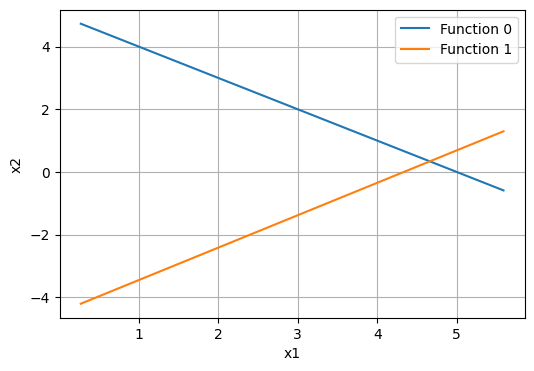

In [329]:
f3 = lambda x: (10 - 2 * x) / 2.0
f4 = lambda x: (13 - 3 * x) / k

plot_graphic([f3, f4], x[0, 0] * 0.8, x[1, 0] * 1.2)

### Conclusões

Não foi possível encontrar nenhum valor de k que atenda os critérios de convergência do método de Gauss Jacobi que é ter raio espectral menor que 1 ou atender ao critério das linhas ou ao das colunas.

Entretanto, ignorando as verificações de convergência, foi possível definir um intervalo de valores no qual é se obtem soluções para o sistema. Sendo esse intervalo valores de k menores ou iguais a 3 e maiores que -3 (-3 < k <= 3).

## Exercício 3

(m3 * g - c3 * v)/m3 = a + 0T -  R

(m1 * g - c1 * v)/m1 = a -  T + 0R

(m2 * g - c2 * v)/m2 = a +  T +  R

In [330]:
A = np.array([
    [1,  0, -1],
    [1, -1,  0],
    [1,  1,  1]
], dtype=np.float32)
b = np.array([
    [9.8 - (17 * 5)/40],
    [9.8 - (10 * 5)/70],
    [9.8 - (14 * 5)/60]
], dtype=np.float32)
xs0 = np.array([
    [1],
    [1],
    [1]
], dtype=np.float32)

In [332]:
try:
  x, history = gauss_seidel_method(xs0, A, b, 1e-3)
  print(x)
except Exception as ex:
  print(f"Exceção encontrada: {ex}")

Exceção encontrada: Spectral ray is greater or equal to 1 and matrix is not diagonaly dominant!


### Conclusões

As condições de convergência para o método de Gauss-Seidel não foram atendidadas pela matriz. Para ocorrer a convergência era necessário que a matriz fosse diagonalmente dominante ou com raio espectral menor que 1.

A matriz é diagonalmente dominante quando atende ao menos o critério das linhas ou o das colunas sendo o das linhas obtido através da máximo valor da soma de todos os valores em módulo de cada linha, e o das colunas a mesma coisa só que para as colunas.

Já o raio espectral é obtido através do cáculo de autovalores da matriz, no qual é pego o maior valor em módulo.

## Exercício 4

In [245]:
A = np.array([
    [1.05, 2.05],
    [1.10, 2.00]
])

b = np.array([
    [5.15],
    [5.10]
])

### a) Graficamente

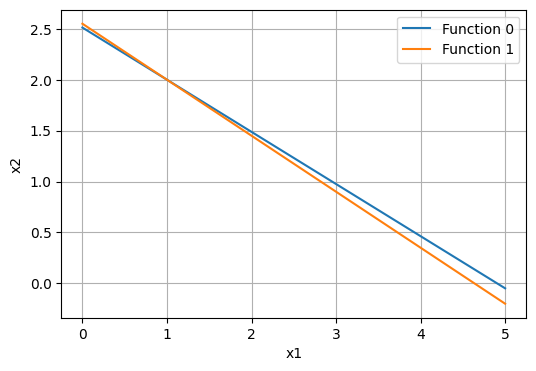

In [263]:
f1 = lambda x: (5.15 - 1.05 * x) / 2.05
f2 = lambda x: (5.10 - 1.10 * x) / 2.00

plot_graphic([f1, f2], 0, 5)

### b) Por Eliminação de Gauss com Pivotamento Parcial, de modo exato.

In [246]:
A1, b1 = gauss_elimination(A, b, True)
xs = retro_replacement(A1, b1)
print(f"x1: {xs[0]}")
print(f"x2: {xs[1]}")
#print(f"Xs:\n{tabulate(xs, tablefmt='simple_grid', floatfmt='.10f', numalign='right')}\n")

x1: 0.9999999999999827
x2: 2.0000000000000093


### c) Por Eliminação de Gauss com Pivotamento Parcial, mas com 3 algarismos significativos. Utilize aritmética de arredondamento.

In [249]:
A1, b1 = gauss_elimination(A, b, True)
##xs = np.round(retro_replacement(A1, b1), decimals=3)
print(f"x1: {np.round(xs[0], decimals=3)}")
print(f"x2: {np.round(xs[1], decimals=3)}")

x1: 1.0
x2: 2.0


### d) Justifique os resultados obtidos.

Os resultados obtidos demonstram que a solução desse sistema de equações é aproximadamente 2.0 e 1.0. Possivelmente o valor do resultado deve ser esse, mas devido a erros de representação nos computadores o resultado não pode ser exatamente preciso.